In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

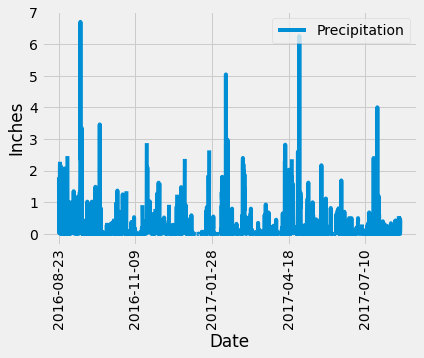

<Figure size 432x288 with 0 Axes>

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date <= dt.date(2017,8,23)).\
    filter(measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
data = pd.DataFrame(results)
data.columns = ['Date', 'Precipitation']
data.set_index('Date', inplace=True)

# Sort the dataframe by date
data_sorted = data.sort_values('Date')
data_sorted.head()

# Use Pandas Plotting with Matplotlib to plot the data
data_sorted.plot()
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation="vertical")
plt.yticks(np.arange(0,8,1))
plt.legend(loc='upper right')
plt.show()

plt.savefig("Exports/precipitation_chart.png")

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_sorted.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station.station).count()
print(station_count)

9


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).first()

('USC00519281', 2772)

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == "USC00519281").all()
most_active

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [29]:
# Save to DataBase
most_active_db = pd.DataFrame(most_active, columns=["Station", "Min Temp", "Max Temp", "Avg Temp"])
most_active_db

,Station,Min Temp,Max Temp,Avg Temp
0,USC00519281,54.0,85.0,71.663781


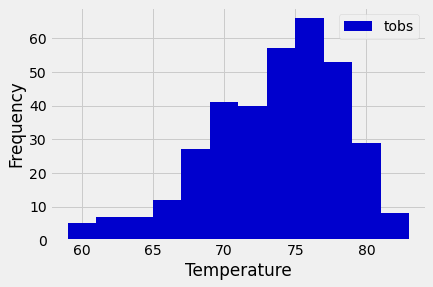

<Figure size 432x288 with 0 Axes>

In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_temps = session.query(measurement.tobs).\
    filter(measurement.date >= '2016-08-23').\
    filter(measurement.station == "USC00519281").all()
just_temps = [x[0] for x in active_station_temps]
plt.hist(just_temps, bins=12, color='mediumblue')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.show()

plt.savefig("Exports/temperature_hist.png")

# Close session

In [16]:
# Close Session
session.close()